In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

In [111]:
d90_file = '../results/complexity_utf-16_10_10_1234_bibles_90_lcm.csv'
dall_file = '../results/complexity_utf-16_10_10_1234_bibles_lcm.csv'
df90 = pd.read_csv(d90_file)
dfall = pd.read_csv(dall_file)

In [112]:
def calculate_sem(group):
    std = group['value'].std()
    n = len(group)
    sem = std / np.sqrt(n)
    return sem

In [127]:
def calculate_sem_per_group(df):
    sem_stats = df.groupby(['language', 'algorithm', 'metric']).apply(calculate_sem).reset_index()
    sem_stats.columns = ['language', 'algorithm', 'metric', 'sem']
    return sem_stats

sem_90 = calculate_sem_per_group(df90)
sem_all = calculate_sem_per_group(dfall)

sem_90.to_csv('../results/sem_90_output.csv', index=False)
sem_all.to_csv('../results/sem_all_output.csv', index=False)

print(sem_90.head(100))

         language algorithm      metric           sem
0   ANCIENT_GREEK       bz2   del-chars  1.705063e-04
1   ANCIENT_GREEK       bz2  del-verses  3.928615e-04
2   ANCIENT_GREEK       bz2   del-words  2.516893e-04
3   ANCIENT_GREEK       bz2  do-nothing  0.000000e+00
4   ANCIENT_GREEK       bz2   rep-words  3.626561e-04
5   ANCIENT_GREEK      gzip   del-chars  1.779881e-04
6   ANCIENT_GREEK      gzip  del-verses  5.606159e-04
7   ANCIENT_GREEK      gzip   del-words  2.538412e-04
8   ANCIENT_GREEK      gzip  do-nothing  0.000000e+00
9   ANCIENT_GREEK      gzip   rep-words  3.622517e-04
10  ANCIENT_GREEK      none   del-chars  3.700743e-17
11  ANCIENT_GREEK      none  del-verses  2.736202e-04
12  ANCIENT_GREEK      none   del-words  1.432703e-04
13  ANCIENT_GREEK      none  do-nothing  0.000000e+00
14  ANCIENT_GREEK      none   rep-words  0.000000e+00
15        APALAÍ       bz2   del-chars  3.410904e-04
16        APALAÍ       bz2  del-verses  4.250937e-04
17        APALAÍ       bz2 

/tmp/ipykernel_52729/2291831967.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sem_stats = df.groupby(['language', 'algorithm', 'metric']).apply(calculate_sem).reset_index()
/tmp/ipykernel_52729/2291831967.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sem_stats = df.groupby(['language', 'algorithm', 'metric']).apply(calculate_sem).reset_index()


Plotting gzip - del-chars for d90


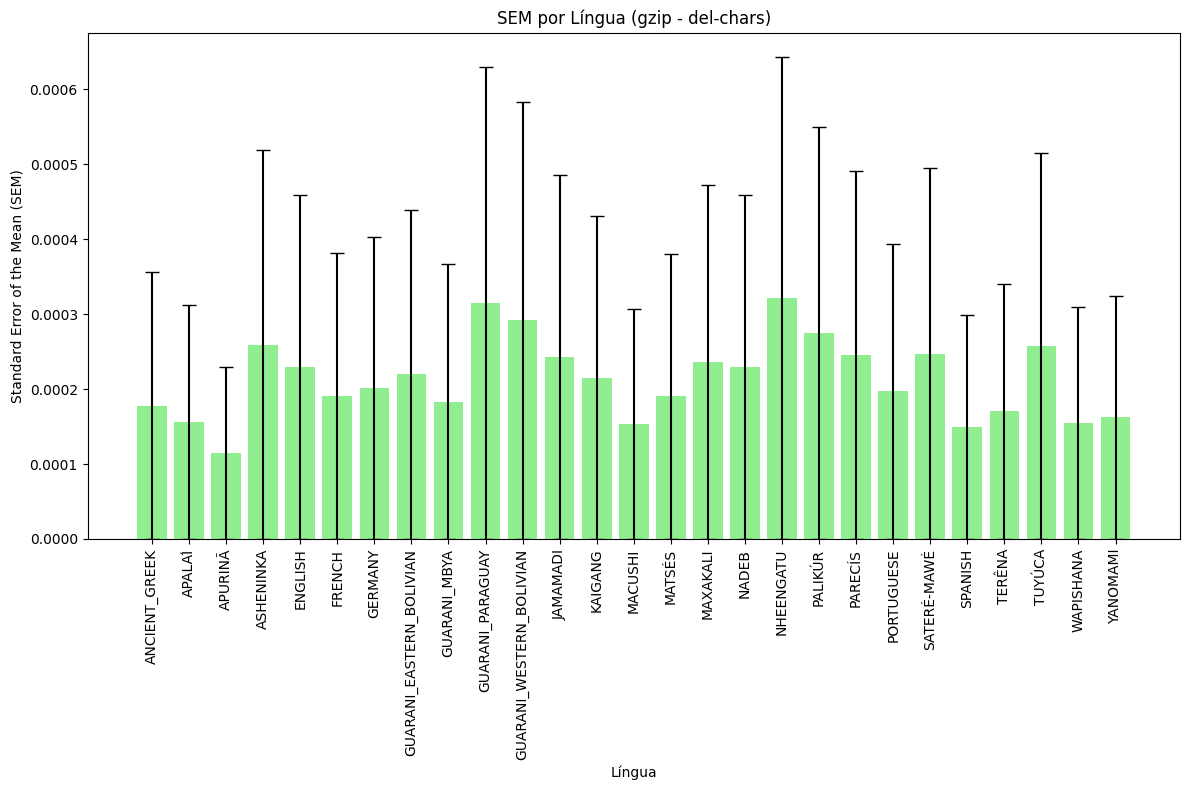

Plotting gzip - del-chars for Dall


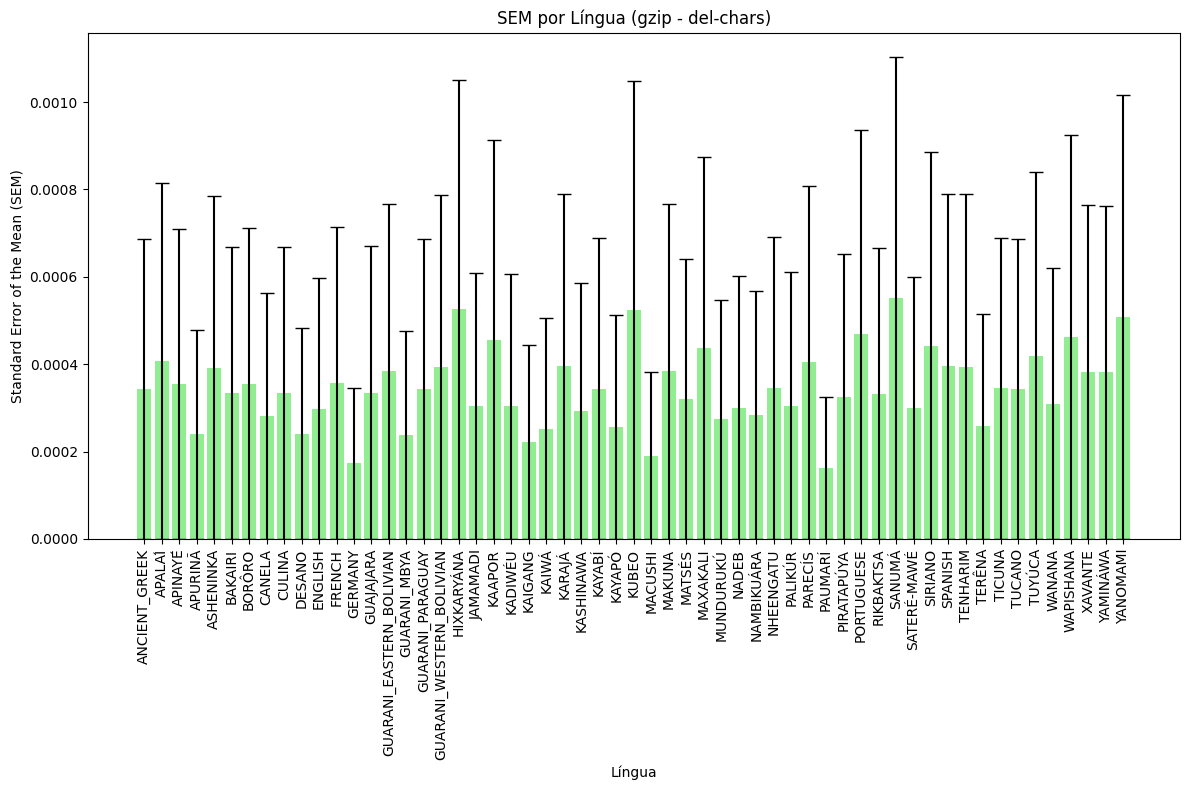

Plotting gzip - del-verses for d90


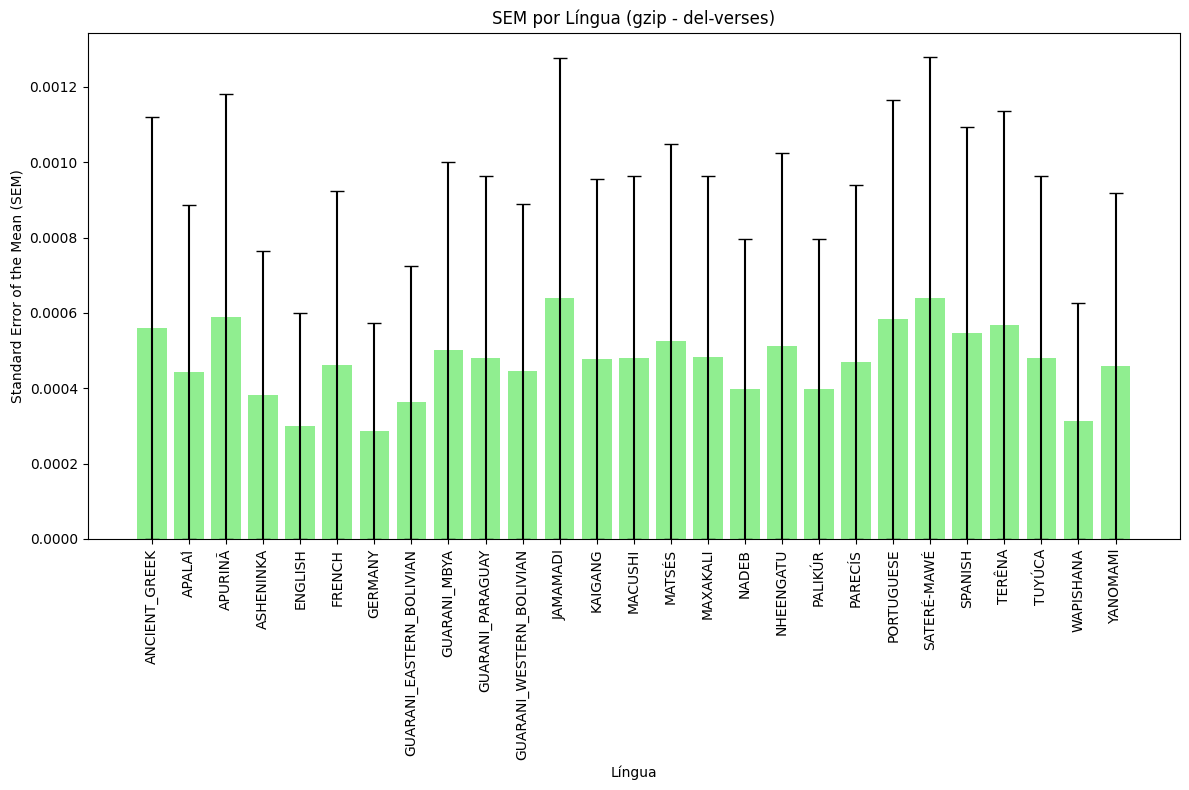

Plotting gzip - del-verses for Dall


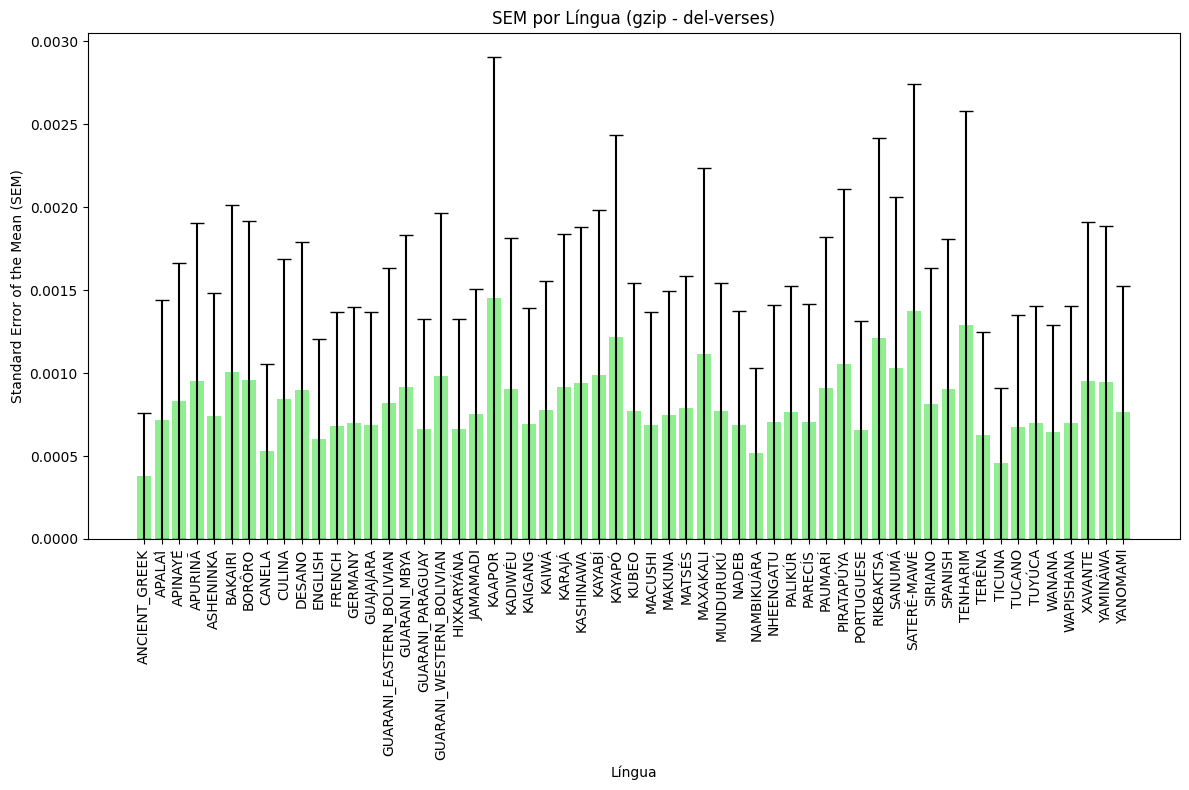

In [125]:
def plot_bar_with_error(sem_stats, algo, metric, pdf):
    df_algo_metric = sem_stats[(sem_stats['algorithm'] == algo) & (sem_stats['metric'] == metric)]
    
    plt.figure(figsize=(12, 8))
    plt.bar(df_algo_metric['language'], df_algo_metric['sem'], color='lightgreen', yerr=df_algo_metric['sem'], capsize=5)
    plt.xticks(rotation=90)
    plt.xlabel('Língua')
    plt.ylabel('Standard Error of the Mean (SEM)')
    plt.title(f'SEM por Língua ({algo} - {metric})')
    plt.tight_layout()
    pdf.savefig() 
    plt.show()
    plt.close()


selected_algorithms = ['gzip']  # Substitua pelos algoritmos desejados
selected_metrics = ['del-chars', 'del-verses']  # Substitua pelas métricas desejadas    

with PdfPages('../images/h3_bar_with_error.pdf') as pdf:
    for algo in selected_algorithms:
        for metric in selected_metrics:
            print(f"Plotting {algo} - {metric} for d90")
            plot_bar_with_error(sem_90, algo, metric, pdf)

            print(f"Plotting {algo} - {metric} for Dall")
            plot_bar_with_error(sem_all, algo, metric, pdf)

Plotting gzip - del-verses for d90


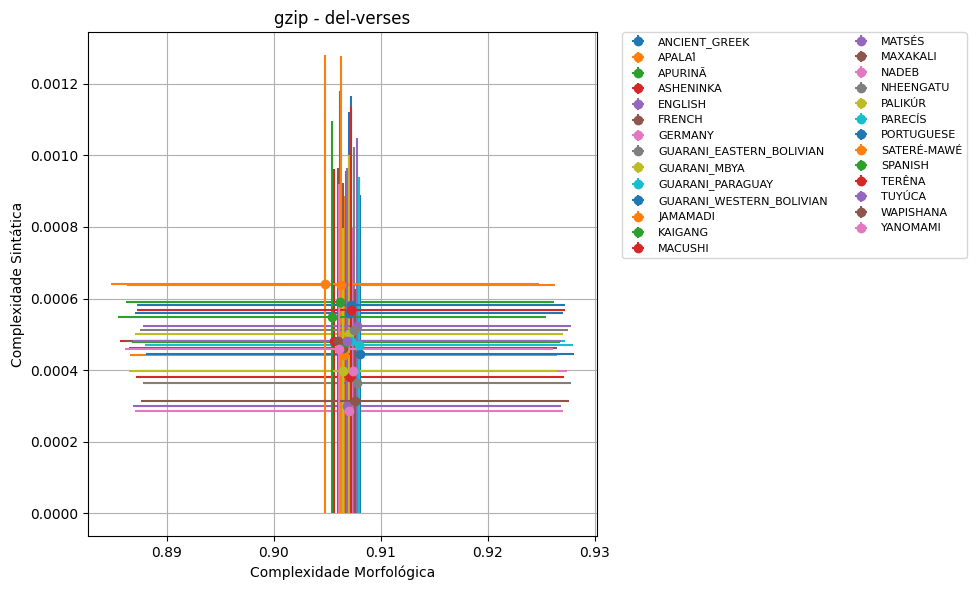

Plotting gzip - del-verses for Dall


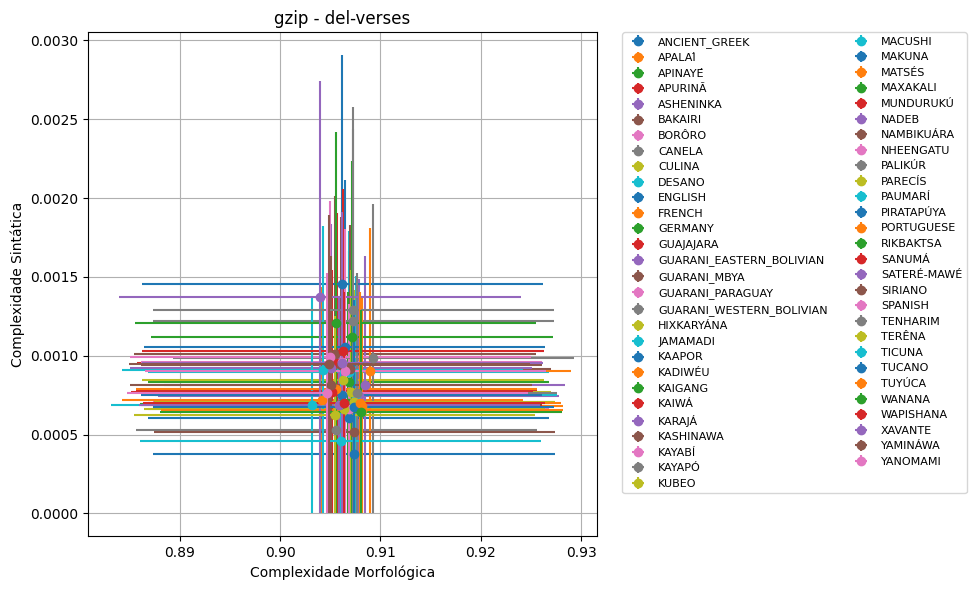

Plotting gzip - del-words for d90


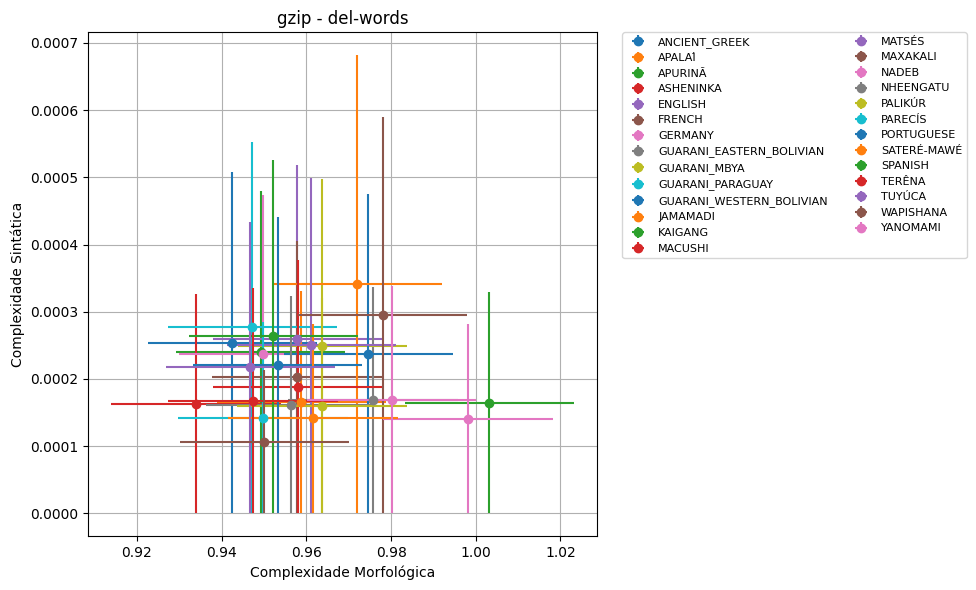

Plotting gzip - del-words for Dall


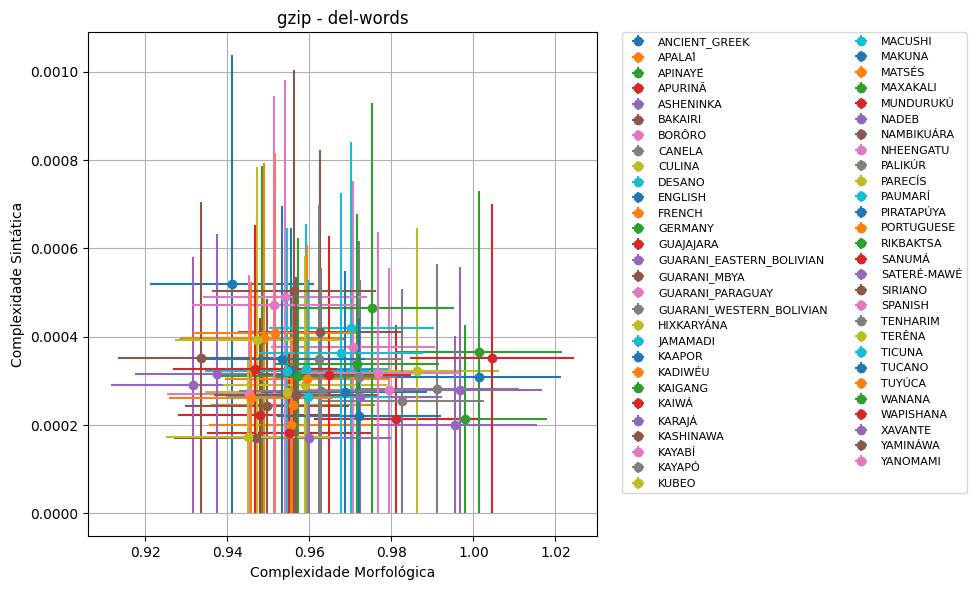

Plotting gzip - del-chars for d90


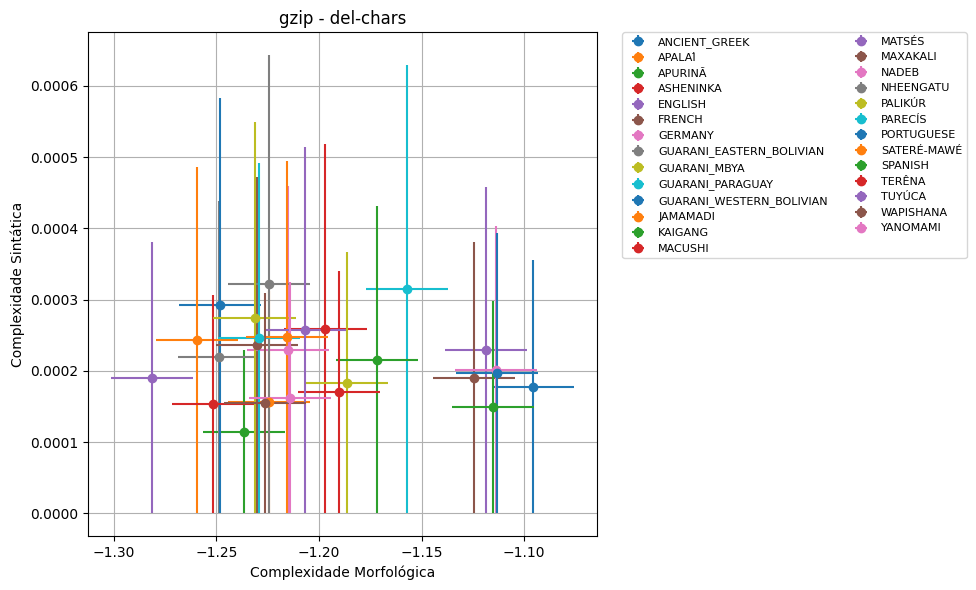

Plotting gzip - del-chars for Dall


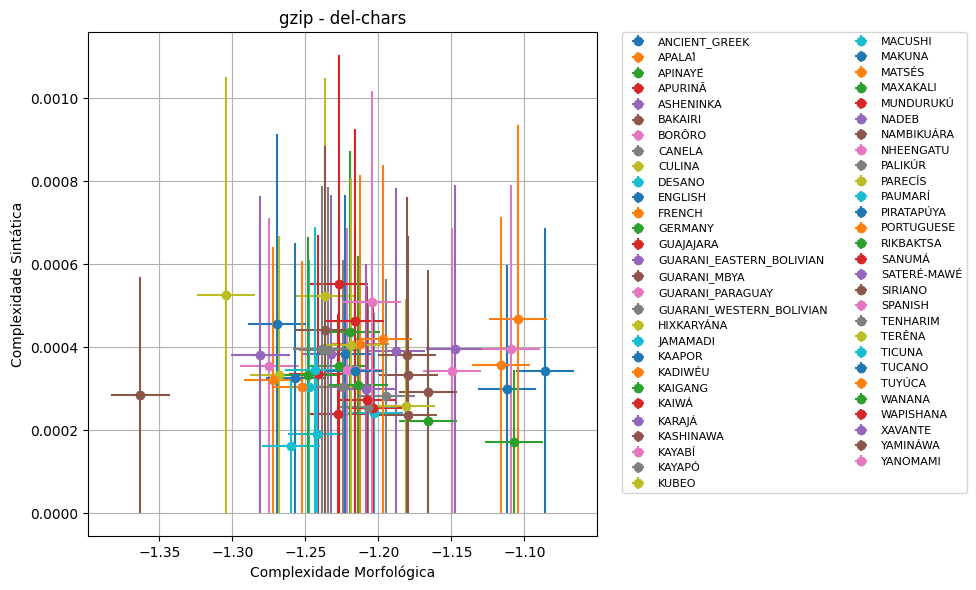

Plotting gzip - rep-words for d90


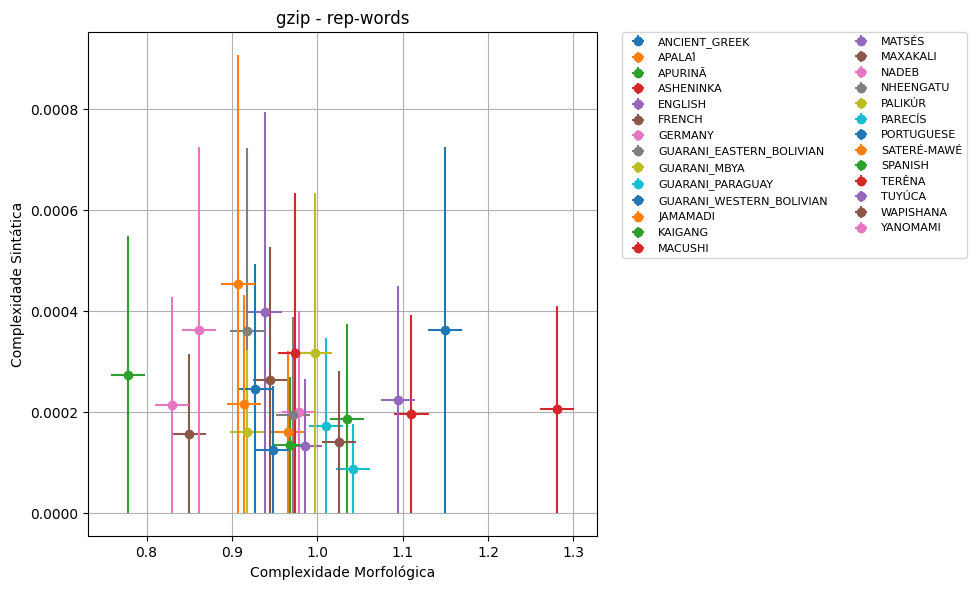

Plotting gzip - rep-words for Dall


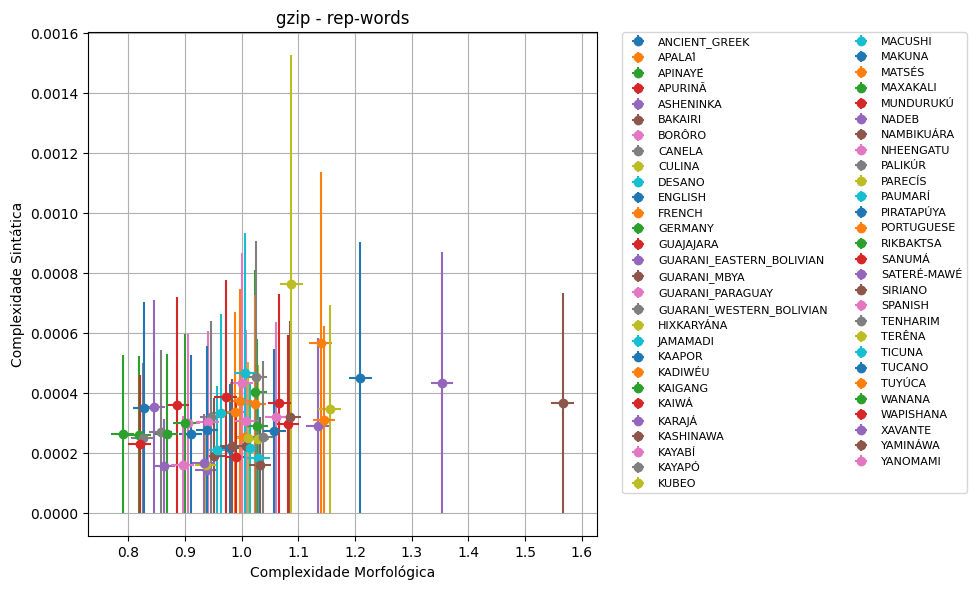

Plotting gzip - do-nothing for d90


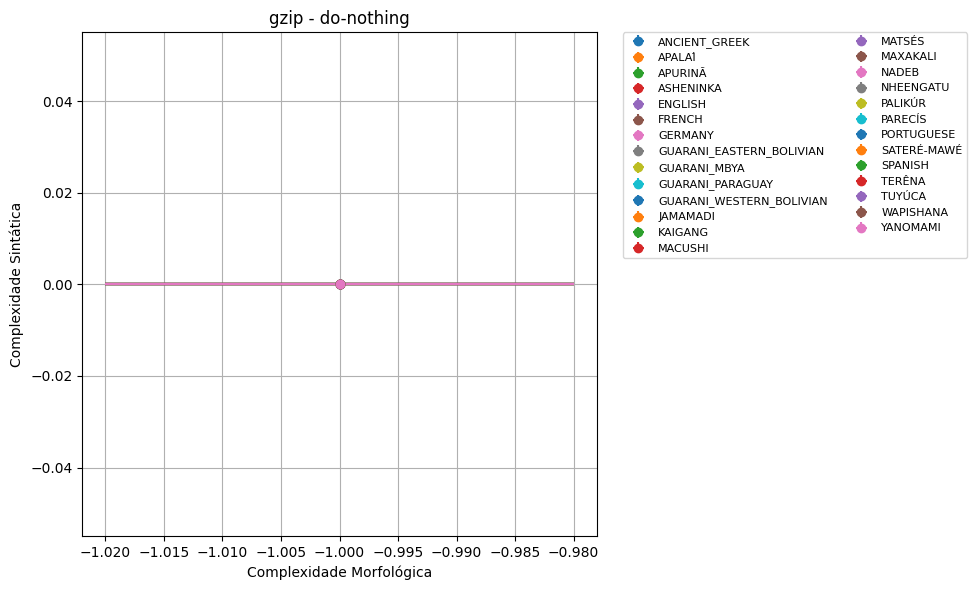

Plotting gzip - do-nothing for Dall


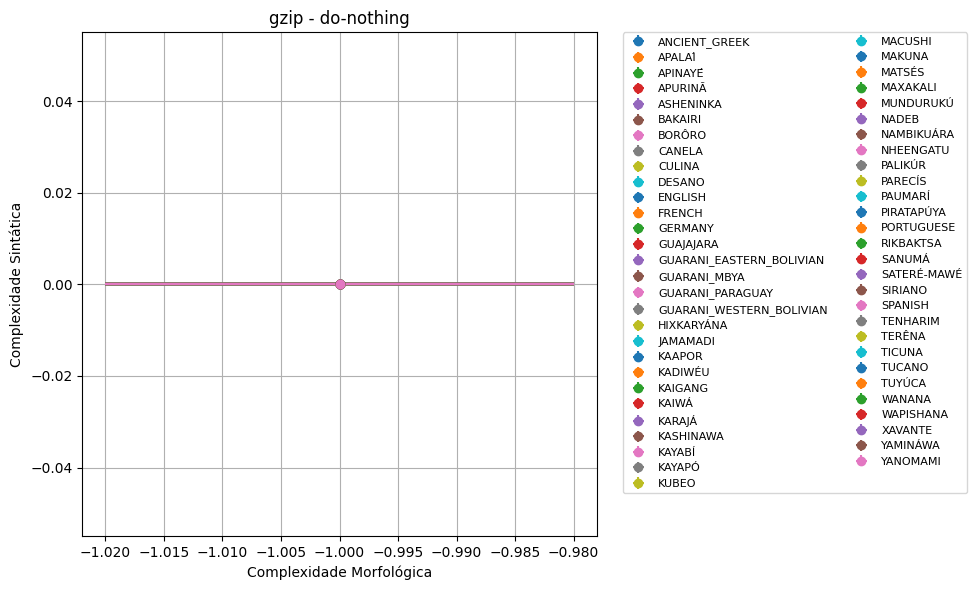

Plotting bz2 - del-verses for d90


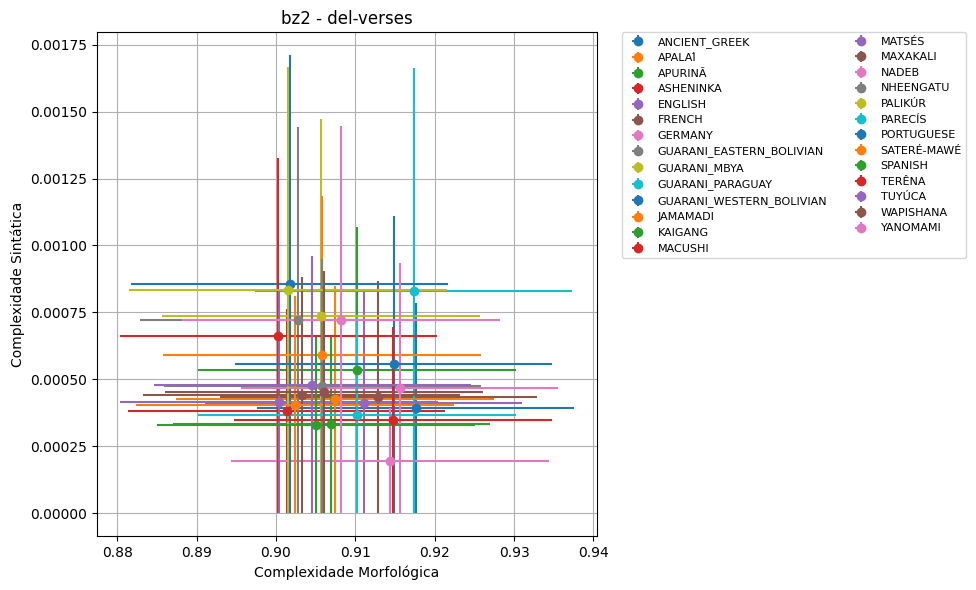

Plotting bz2 - del-verses for Dall


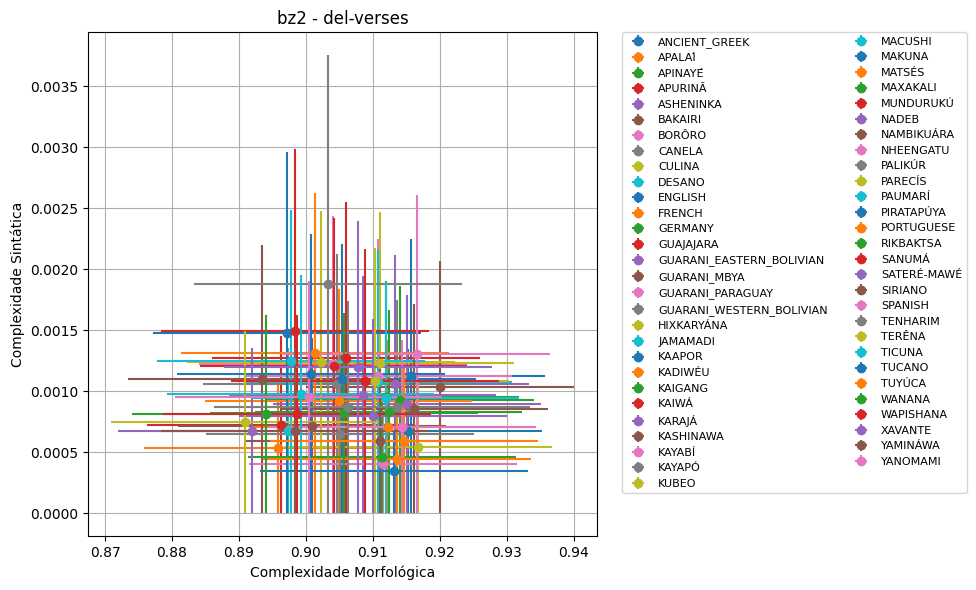

Plotting bz2 - del-words for d90


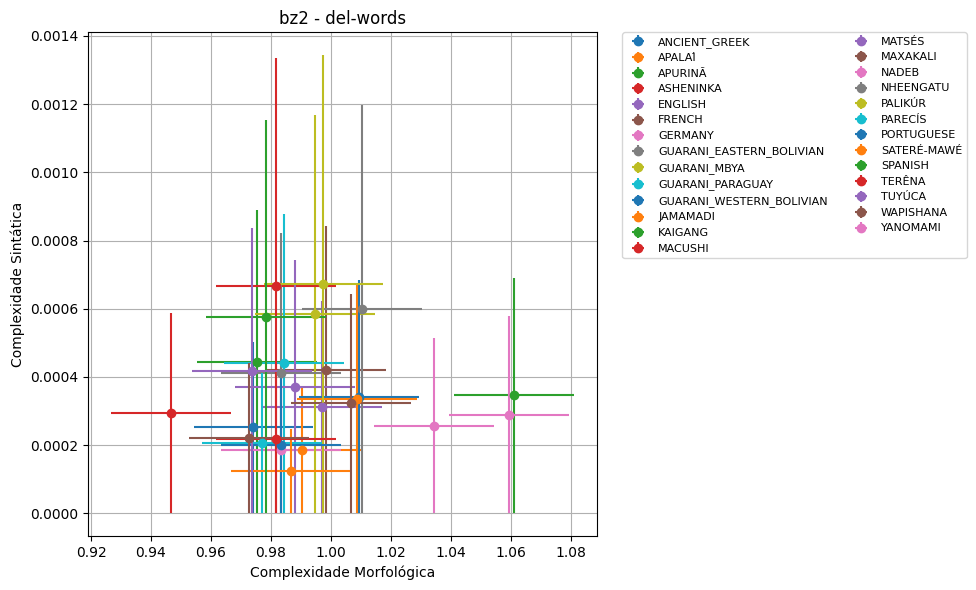

Plotting bz2 - del-words for Dall


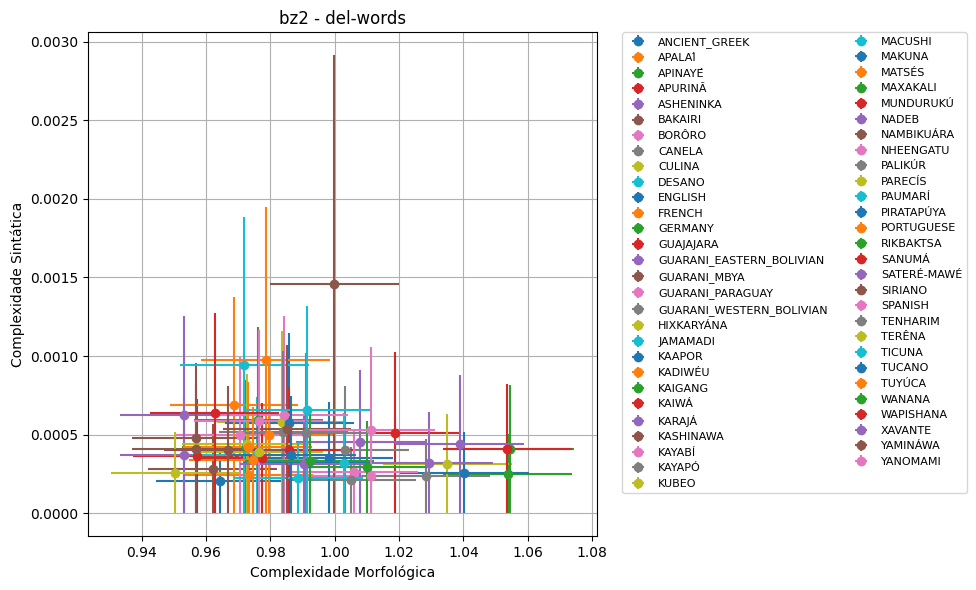

Plotting bz2 - del-chars for d90


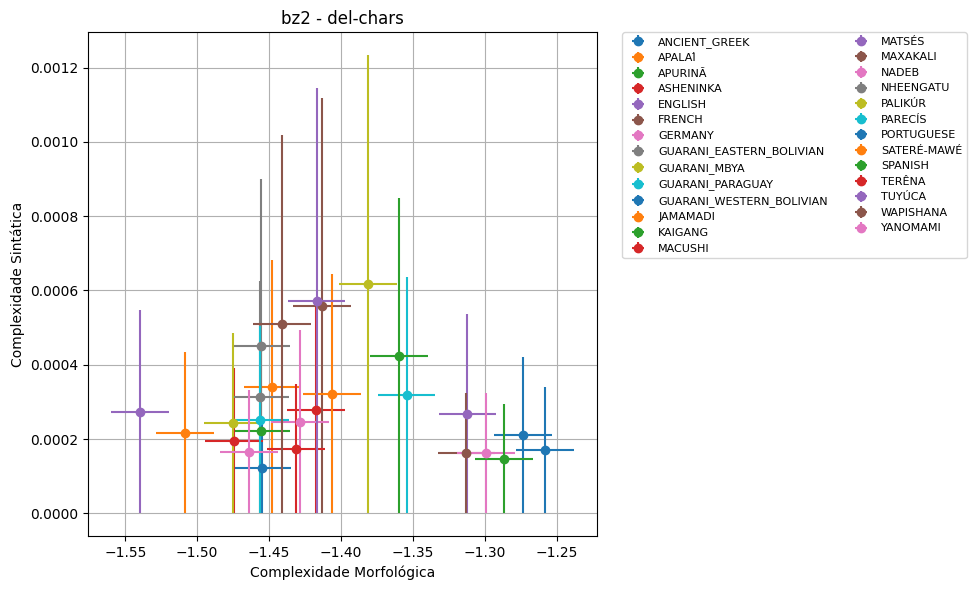

Plotting bz2 - del-chars for Dall


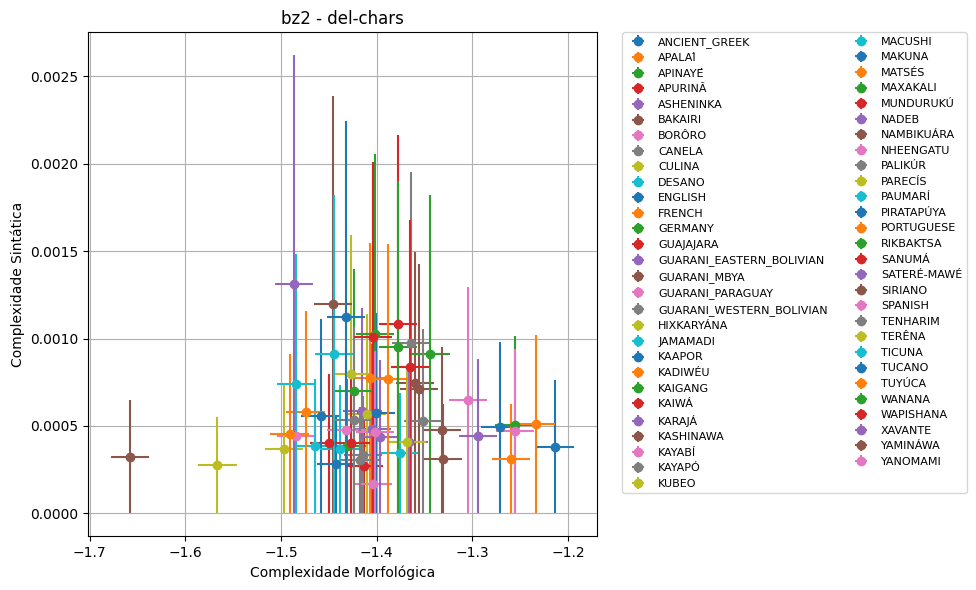

Plotting bz2 - rep-words for d90


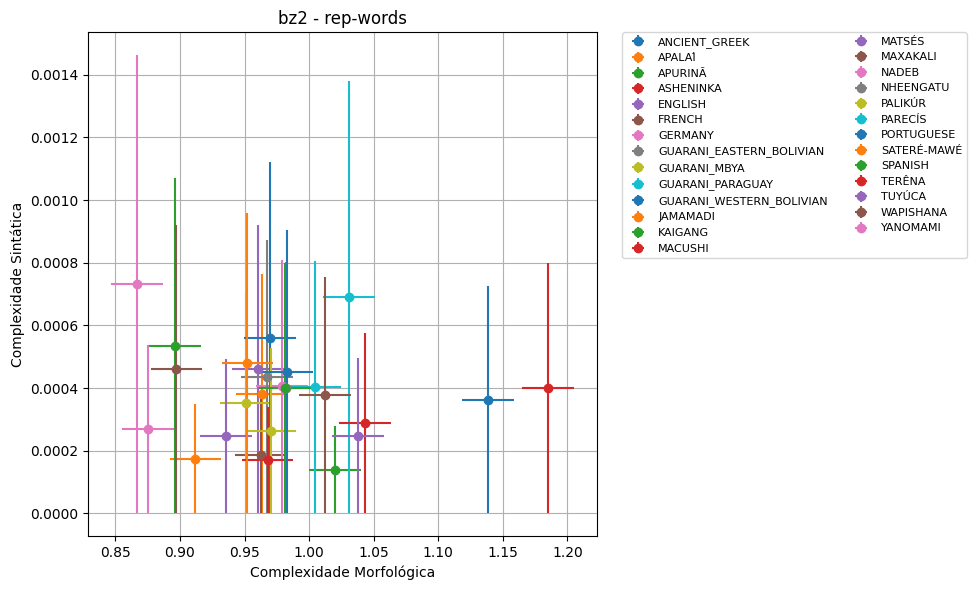

Plotting bz2 - rep-words for Dall


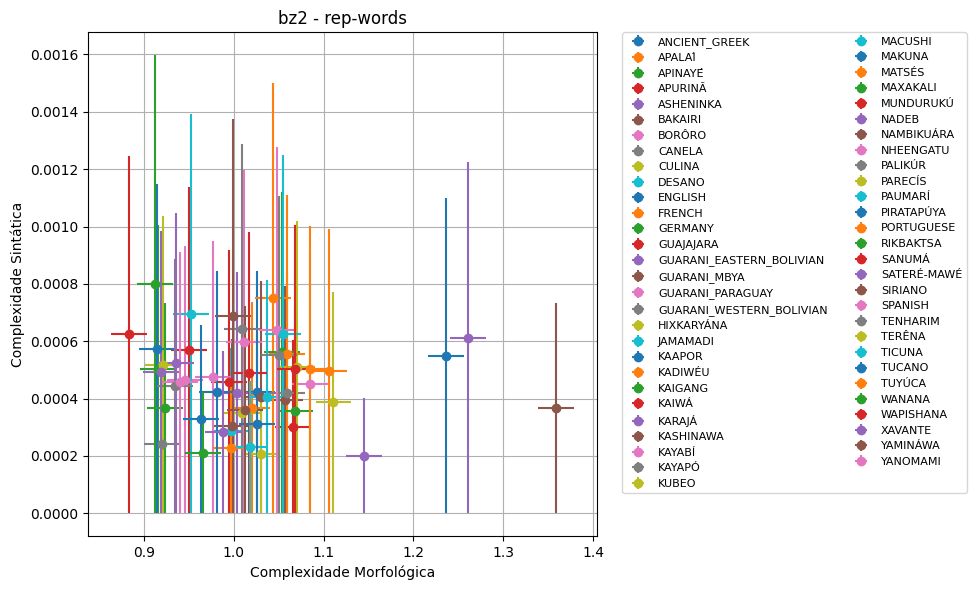

Plotting bz2 - do-nothing for d90


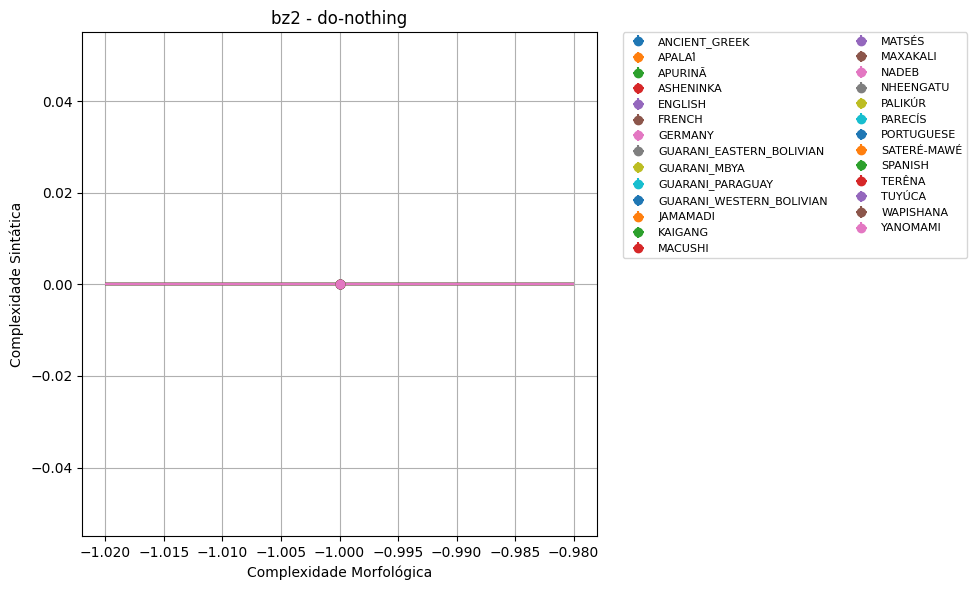

Plotting bz2 - do-nothing for Dall


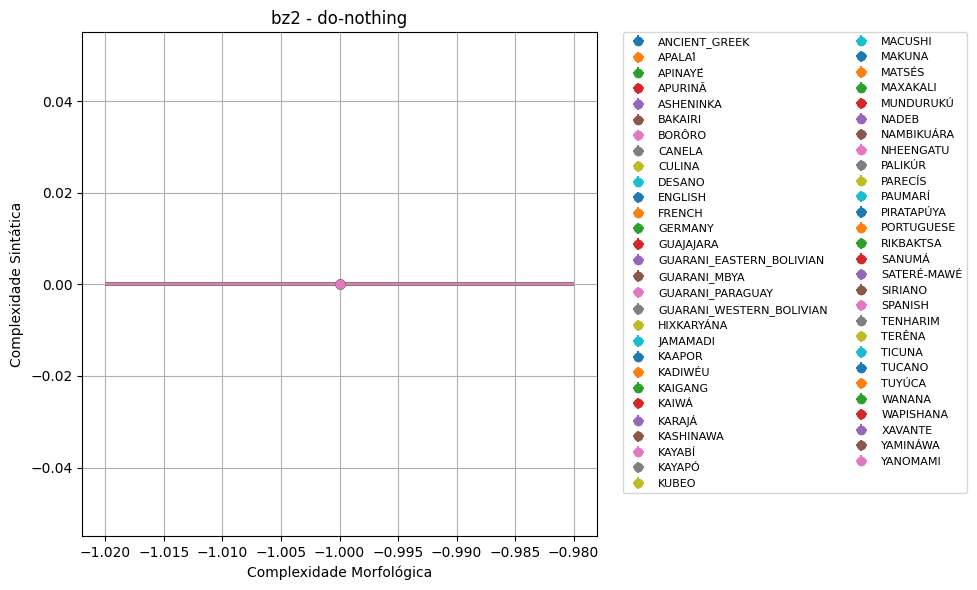

Plotting none - del-verses for d90


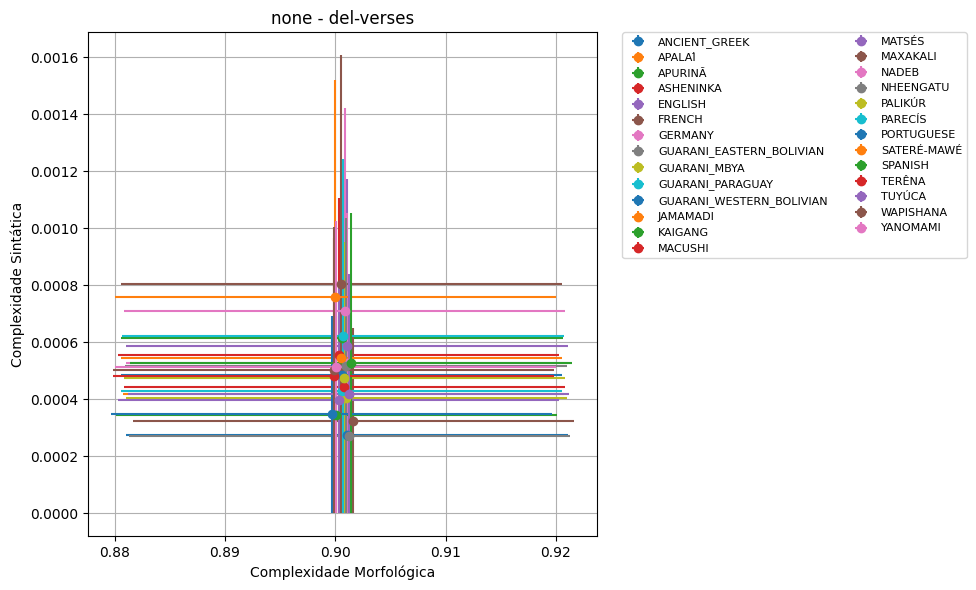

Plotting none - del-verses for Dall


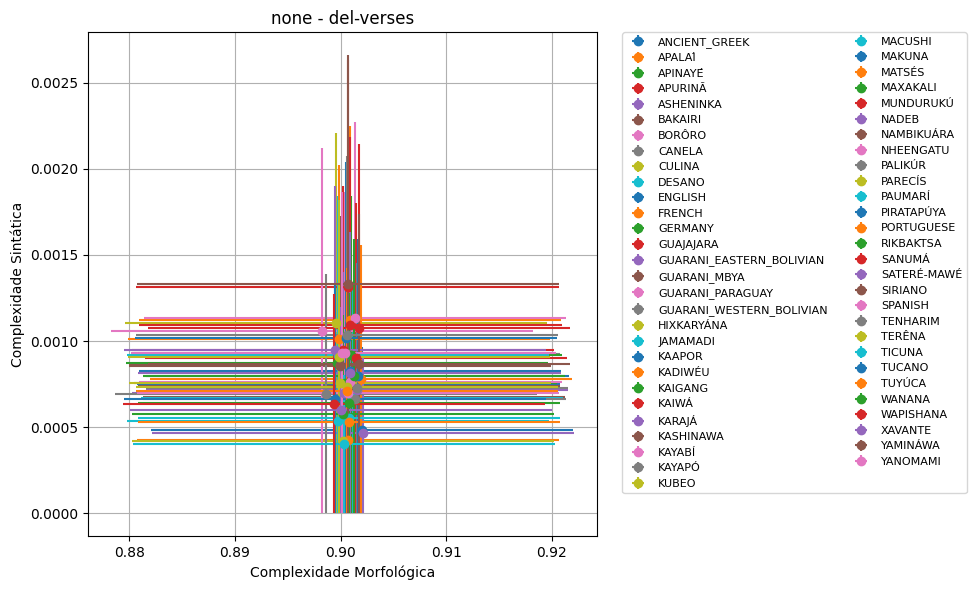

Plotting none - del-words for d90


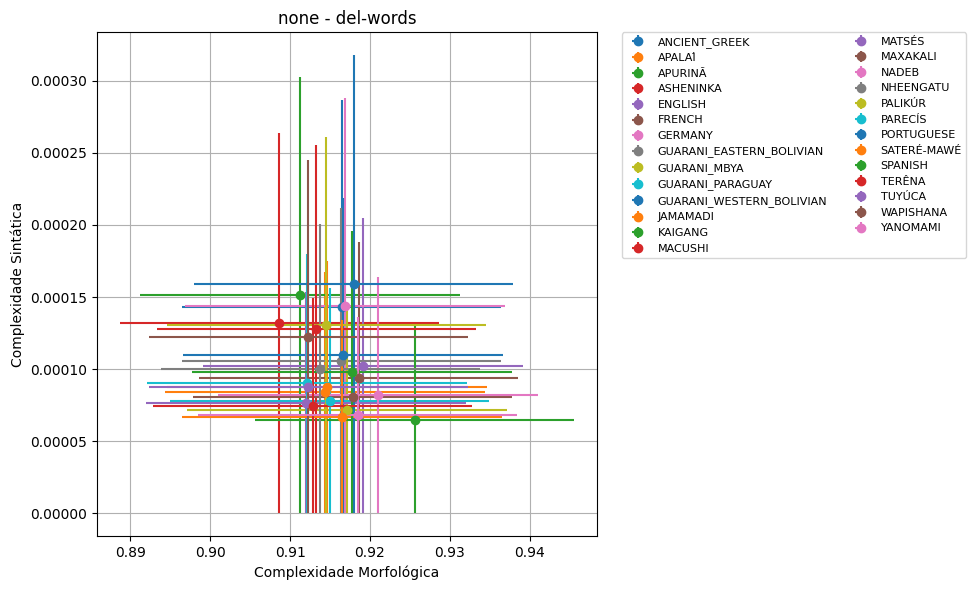

Plotting none - del-words for Dall


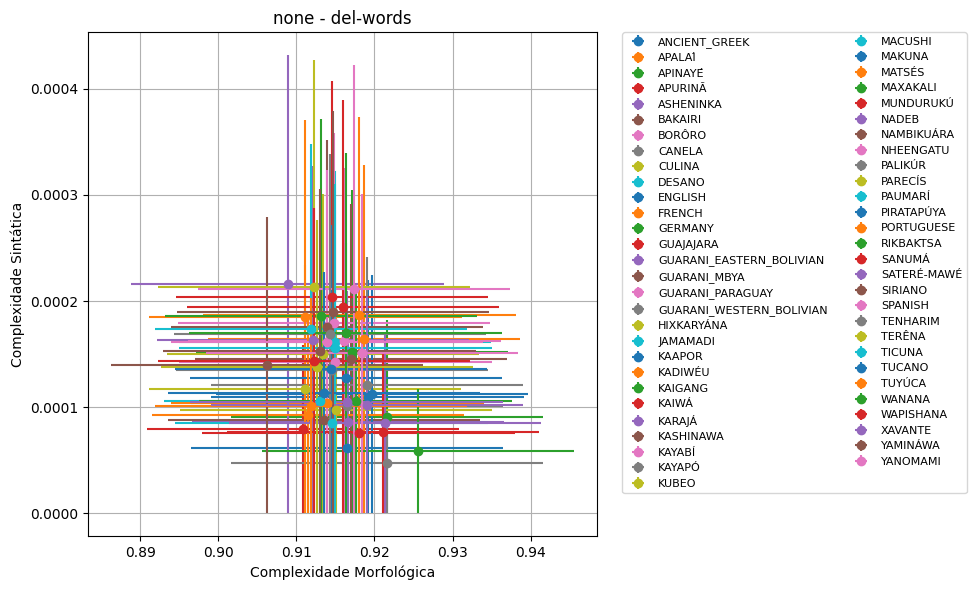

Plotting none - del-chars for d90


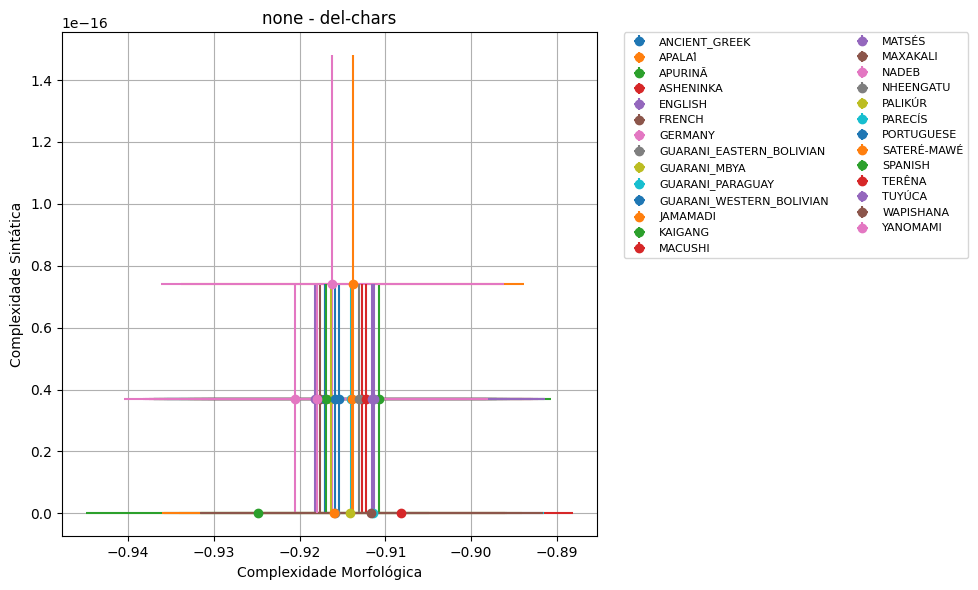

Plotting none - del-chars for Dall


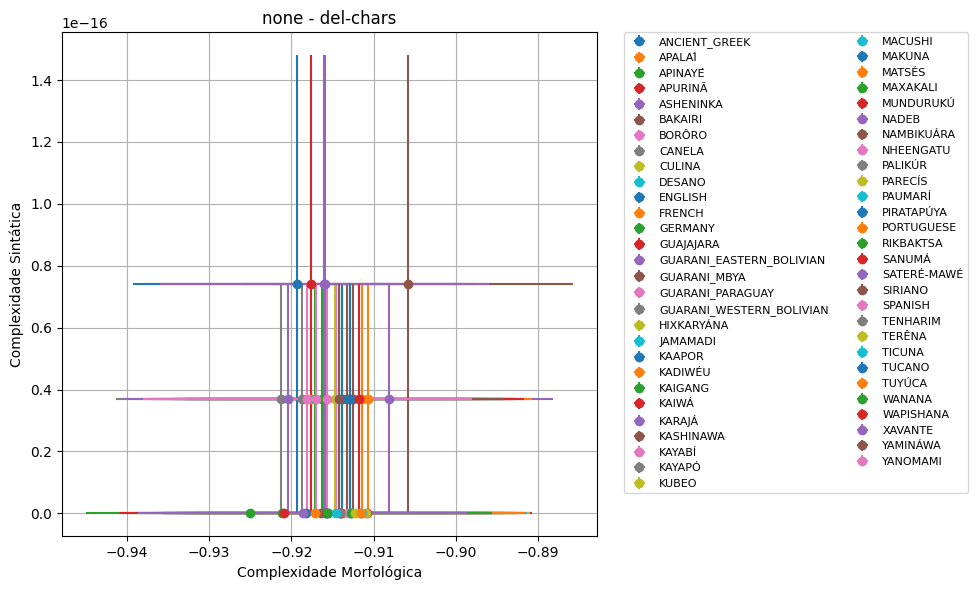

Plotting none - rep-words for d90


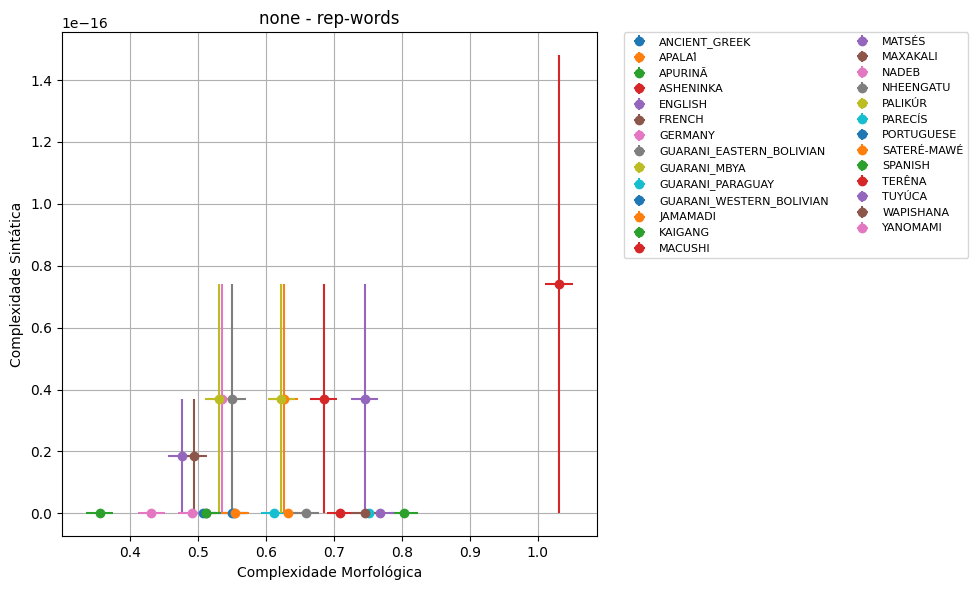

Plotting none - rep-words for Dall


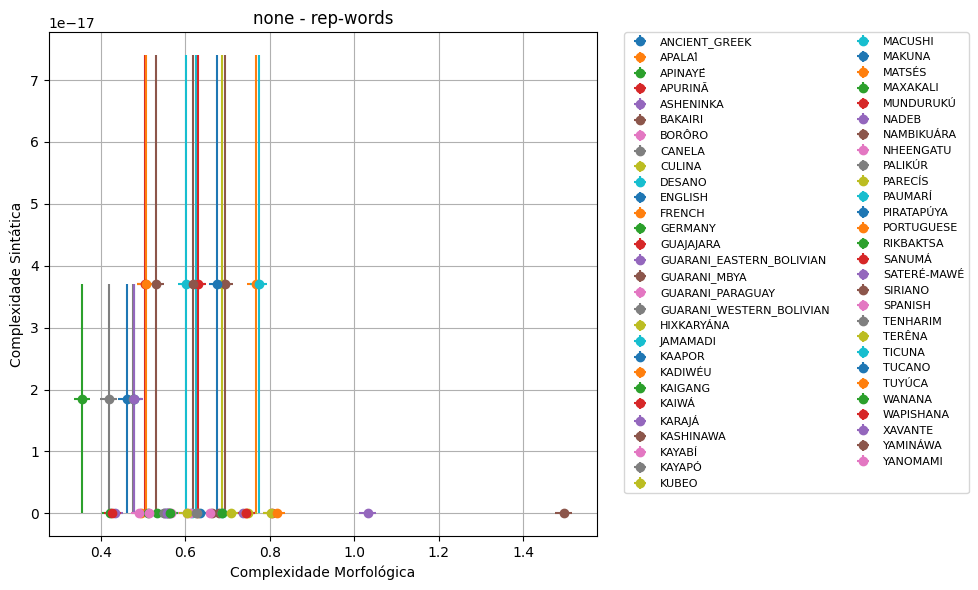

Plotting none - do-nothing for d90


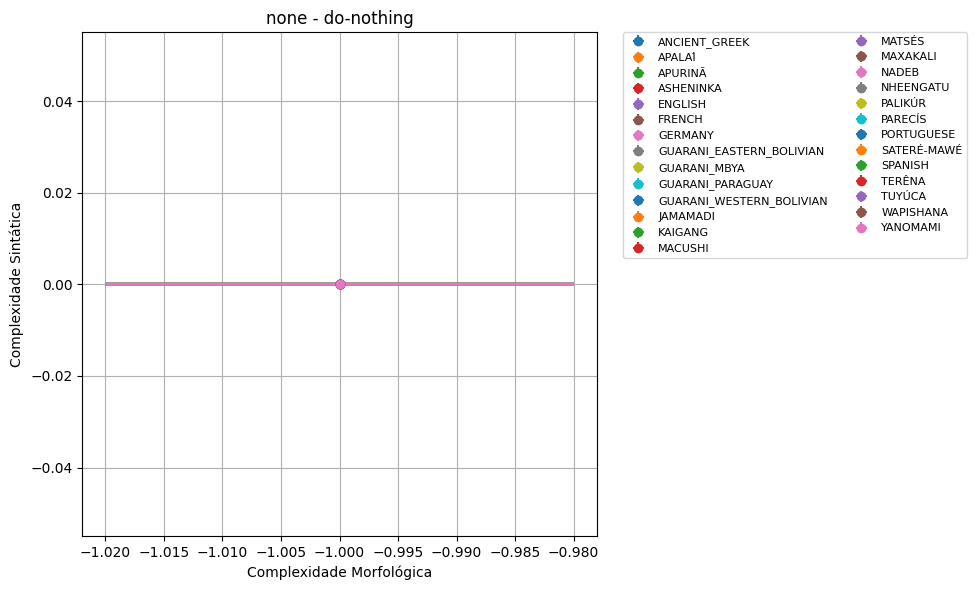

Plotting none - do-nothing for Dall


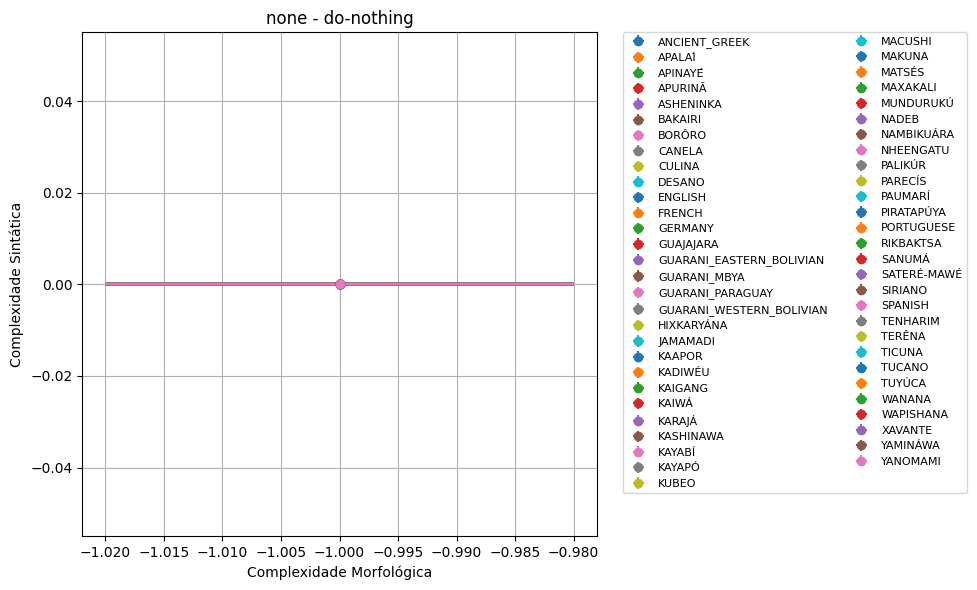

In [126]:

def plot_and_save_error_bars(sem_stats, df, algo, metric, pdf):
    df_algo_metric = df[(df['algorithm'] == algo) & (df['metric'] == metric)]
    sem_algo_metric = sem_stats[(sem_stats['algorithm'] == algo) & (sem_stats['metric'] == metric)]

    plt.figure(figsize=(10, 6))
    for language in df_algo_metric['language'].unique():
        x = df_algo_metric[df_algo_metric['language'] == language]['value'].mean()
        y = sem_algo_metric[sem_algo_metric['language'] == language]['sem'].values[0]
        plt.errorbar(x, y, xerr=0.02, yerr=y, fmt='o', label=language)

    plt.title(f'{algo} - {metric}')
    plt.xlabel('Complexidade Morfológica')
    plt.ylabel('Complexidade Sintática')
    plt.legend(fontsize=8, ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.tight_layout()
    pdf.savefig()  # Salva a figura atual no PDF
    plt.show()
    plt.close()

selected_algorithms = df90['algorithm'].unique() #['gzip']  # Substitua pelos algoritmos desejados
selected_metrics = df90['metric'].unique() # ['del-chars', 'del-verses']  # Substitua pelas métricas desejadas

# Criar PDF
with PdfPages('../images/h3_with_sem.pdf') as pdf:
    for algo in selected_algorithms:
        for metric in selected_metrics:
            print(f"Plotting {algo} - {metric} for d90")
            plot_and_save_error_bars(sem_90, df90, algo, metric, pdf)

            print(f"Plotting {algo} - {metric} for Dall")
            plot_and_save_error_bars(sem_all, dfall, algo, metric, pdf)